In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, insert
import sqlalchemy as sal

%matplotlib inline

### Import from SQL 

In [2]:
# establish connection to the database
engine = sal.create_engine('sqlite:///winewebscraping.db')
# storing tables from database into dataframe
master = pd.read_sql('SELECT * FROM master', engine)
ratings = pd.read_sql('SELECT * FROM ratings', engine)
varietals = pd.read_sql('SELECT * FROM varietals', engine)

In [3]:
#df = pd.read_csv('wine_master_dataset.csv', index_col=0)

In [10]:
master.head()

,product_name,price,varietal,rating,rating_count,appellation,region,year
0,Dom Perignon Vintage with Gift Box,199,Vintage Sparkling Wine,4.5,42.0,['Champagne'],France,2010
1,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,4.3,62.0,['Napa Valley'],California,2017
2,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,4.6,108.0,['Napa Valley'],California,2016
3,Quintessa,199,Cabernet Sauvignon,4.7,73.0,[' Napa Valley'],California,2016
4,Joseph Phelps Insignia,300,Bordeaux Red Blends,4.6,81.0,['Napa Valley'],California,2016


In [11]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count    float64
appellation      object
region           object
year              int64
dtype: object

In [12]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count    float64
appellation      object
region           object
year              int64
dtype: object

In [13]:
#set the base color for the charts
green = sb.color_palette("hls", 8)[3]
purple = sb.color_palette("hls", 8)[6]
yellow = sb.color_palette("hls", 8)[1]

### Price exploration 

In [14]:
master['price'].min(), master['price'].max()

(7, 17999)

In [15]:
master['price'].describe()

count    22004.00000
mean       230.90838
std        564.13669
min          7.00000
25%         62.00000
50%        109.00000
75%        214.00000
max      17999.00000
Name: price, dtype: float64

In [16]:
master['price_cat'] = pd.cut(x = master['price'], bins = [ 0, 100, 250, 500, 1000, 18000], labels = ['$0-$99','$100-$249', '$250-$499','$500-$999','$1000+'], right=False) 

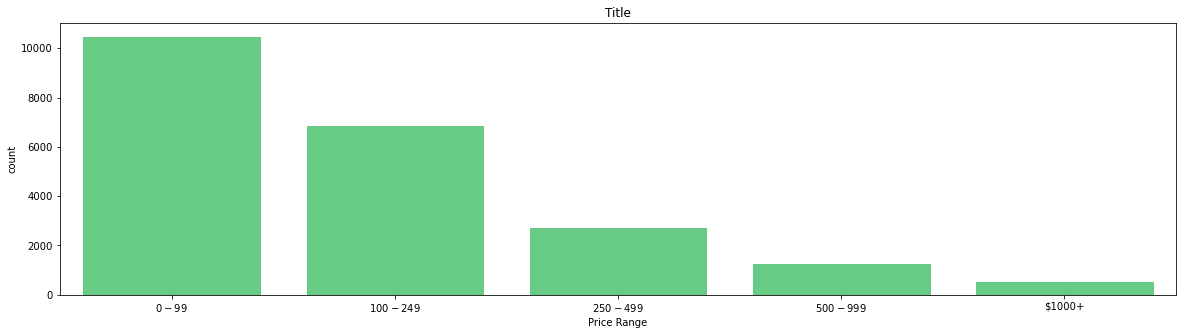

In [17]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='price_cat', color=green, edgecolor='white').set( xlabel = "Price Range");

### Region Exploration 

In [18]:
master['region'].sort_values().unique()

array([' Argentina', ' Australia', ' Austria', ' California', ' Chile',
       ' France', ' Germany', ' Greece', ' Italy', ' New Zealand',
       ' Oregon', ' Other U.S.', ' Portugal', ' South Africa', ' Spain',
       ' Washington'], dtype=object)

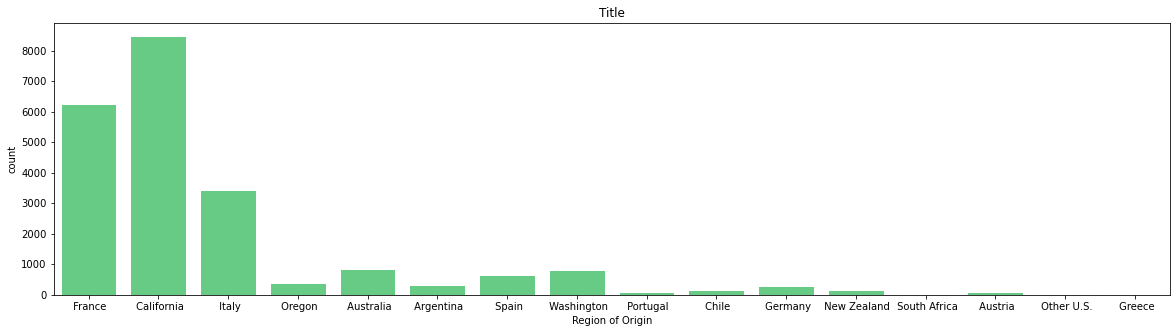

In [19]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='region', color=green, edgecolor='white').set( xlabel = "Region of Origin");

### Appelation Exploration

In [20]:
master['appellation'].sort_values().unique()

array(['["Valle d\'Aosta"]', "[' Bordeaux']", "[' Burgundy']",
       "[' Central Coast']", "[' Columbia Valley']",
       "[' Friuli-Venezia Giulia']", "[' Loire']", "[' Mendocino']",
       "[' Mendoza']", "[' Napa Valley']", "[' New South Wales']",
       "[' New York']", "[' North Coast']", "[' Piedmont']",
       "[' Prosecco']", "[' Rapel Valley']", "[' Rhone']", "[' Salta']",
       "[' San Antonio Valley (Chile)']", "[' Sierra Foothills']",
       "[' Sonoma County']", "[' South Australia']",
       "[' South of France']", "[' Southwest']",
       "[' Trentino-Alto Adige']", "[' Tuscany']", "[' Veneto']",
       "[' Victoria']", "[' Western Australia']",
       "[' Willamette Valley']", "['Abruzzo']", "['Aconcagua Valley']",
       "['Alentejo']", "['Alsace']", "['Auckland']", "['Basilicata']",
       "['Bierzo']", "['Bordeaux']", "['Burgenland']", "['Burgundy']",
       "['Campania']", "['Canterbury']", "['Carneros']",
       "['Casablanca Valley']", "['Central Coast']", "['Ce

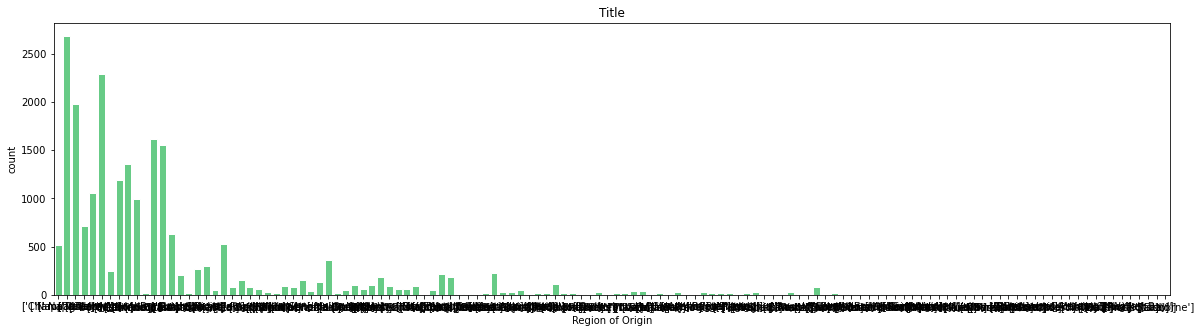

In [21]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='appellation', color=green, edgecolor='white').set( xlabel = "Region of Origin");